<a href="https://colab.research.google.com/github/KhomZ/k/blob/master/khom_171347_Lab3_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 Report



```
Submitted By: 
Name: Khom Raj Thapa Magar
Sem: VII
Year: IV
Roll: 171347
Department of Computer Engineering(Day)
Nepal College of Information Technology(NCIT)
```


```
Submitted To: 
Instructor: Basanta Joshi
```

**Tasks to be performed**
1. Perform  DFT of an image and plot magnitude and phase 
2. Perform low pass filtering ( you can either use your know function or builtin function for calculating FFT/DFT).
3. Perform high pass filtering ( you can either use your know function or builtin function for calculating FFT/DFT).
4. Compare low and high pass filtering results using 3 types of filter function





## Requirements



1.   Python
2.   OpenCV
3.   Numpy
4.   Matplotlib
5.   Math



1. Python:

Python is a high-level, general-purpose and a very popular programming language. Python programming language (lates Python 3) is being used in web development, Machine Learning applications, along with all cutting edge technology in Software Industry. Python Programming Language is very well suited for Beginners, also for experienced programmers with other programming languages like C++ and Java.


2. OpenCV:

OpenCV is a huge-source library for Computer Vision, Machine Learning, and Image Processing. OpenCV supports a wide variety of programming languages like Python, C++, Java, etc. It can process images and videos to identify objects, faces, or even the handwriting of a human. When it is integrated with various libraries, such as Numpy which is a highly optimized library for numerical operations.



3. Numpy:

Numpy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.
Besides its obvious scientific uses, Numpy can also be used as an efficient multi-dimensional container of generic data.


4. Matplotlib


Matplotlib is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack. It was introduced by John Hunter in the year 2002.

One of the greatest benefits of visualization is that it allows us visual access to huge amounts of data in easily digestible visuals. Matplotlib consists of several plots like line, bar, scatter, histogram etc.


5. Math Module

Sometimes when working with some kind of financial or scientific projects it becomes necessary to implement mathematical calculations in the project. Python provides the math module to deal with such calculations. Math module provides functions to deal with both basic operations such as addition(+), subtraction(-), multiplication(*), division(/) and advance operations like trigonometric, logarithmic, exponential functions.


# Discrete Fourier Transform(DFT)

Digital images are now part of our daily life. People can hardly live without it. Therefore, digital image processing becomes more and more important these days.


Here, I'll talk about how to utilize Fast Fourier Transformation in digital image processing, and how to implement it in Python. The process is as following:

1. Implement Fast Fourier Transformation to transform gray scaled image into frequency.

2. Visualize and Centralize zero-freqency component.

3. Apply low/high pass filter to filter frequencies

4. Decentralize

5. Implement inverse Fast Fourier Transformation to generate image data.

## DFT of an Image

In [ ]:
# FFT and DFT implementation
import numpy as np
import cv2
from matplotlib import pyplot as plt


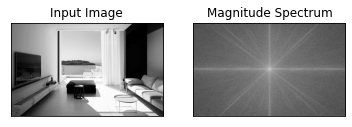

In [ ]:
img = cv2.imread('1.jpg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])



plt.show() 

# FFT (Fast Fourier Transformation)

Digital images, unlike light wave and sound wave in real life, are discrete because pixels are not continuous. That means we should implement Discrete Fourier Transformation(DFT) instead of Fourier Transformation. However, DFT process is often too slow to be practical. So I chose FFT to do digital image processing.

Step 1: Compute the 2-dimensional Fast Fourier Transform.

Step 2: Shift the zero-frequency component to the center of the spectrum.

Step 3: Inverse of Step 2. Shift the zero-frequency component back to original location

Step 4: Inverse of Step 1. Compute the 2-dimensional inverse Fast Fourier Transform.

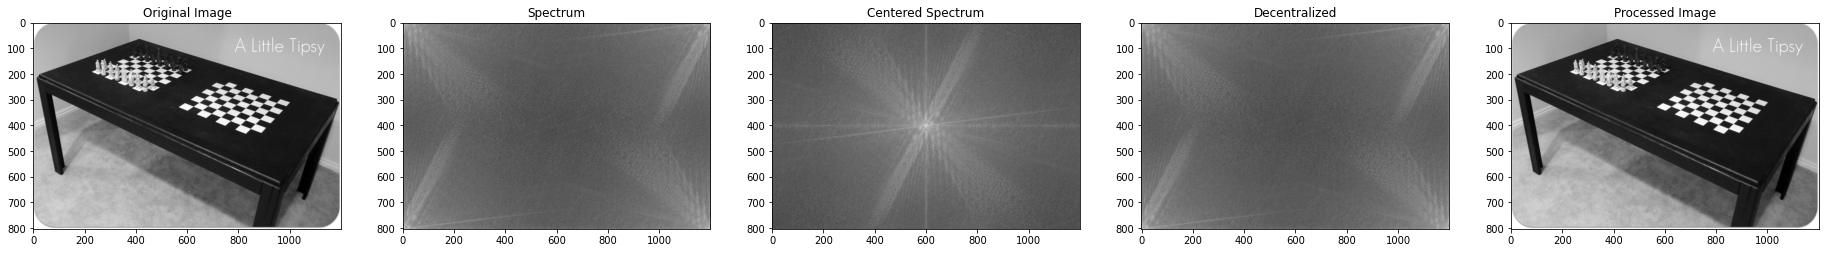

In [ ]:
# In Python, we could utilize Numpy - numpy.fft to implement FFT operation easily.

import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img_c1 = cv2.imread("chess.jpg", 0)
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

## Plotting magnitude and phase

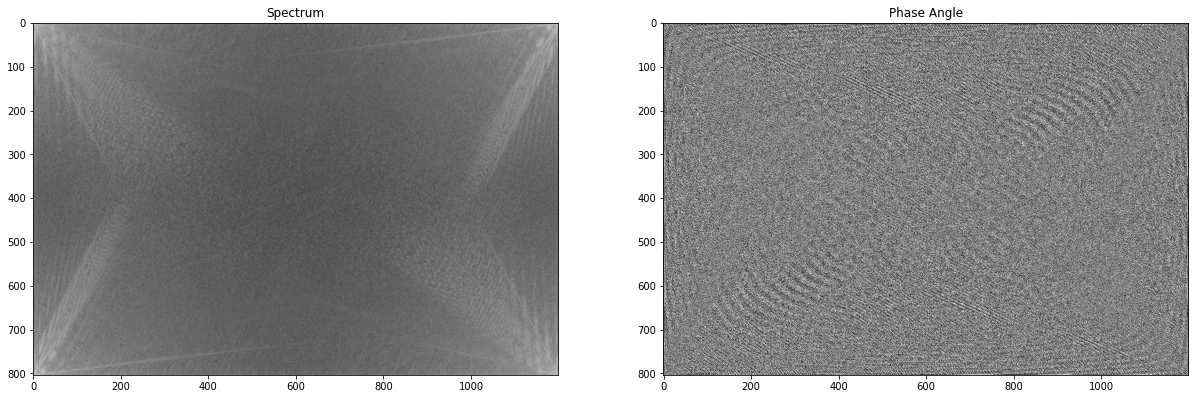

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread('chess.jpg', 0)

original =  np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), 'gray'), plt.title('Spectrum')

plt.subplot(132), plt.imshow(np.angle(original), 'gray'), plt.title('Phase Angle')
plt.show()

In [ ]:
def distance(point1, point2):
    return sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)


def idealFilterLP(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x), center) < D0:
                base[y,x] = 1
    return base


def idealFilterHP(D0, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x), center) < D0:
                base[y,x] = 0
    return base


def butterworthLP(D0, imgShape, n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x), center)/D0)**(2*n))
    return base


def butterworthHP(D0, imgShape, n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x), center)/D0)**(2*n))
    return base


def gaussianLP(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x), center)**2)/(2*(D0**2))))
    return base


def gaussianHP(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x), center)**2)/(2*(D0**2))))
    return base

# Low Pass Filtering using FFT/DFT

Low Pass Filter is a filter that only allows low frequencies to pass through. Low frequencies in images mean pixel values that are changing slowly.
e.g. smooth area with slightly color changing in the image such as the center or new blank white paper is regarded as a low frequency content.

Since the output of low pass filter only allow low frequencies to pass through, the high frequencies contents such as noises are blocked which make processed image has less noisy pixels. Therefore, low pass filter is highly used to remove the noises in images.

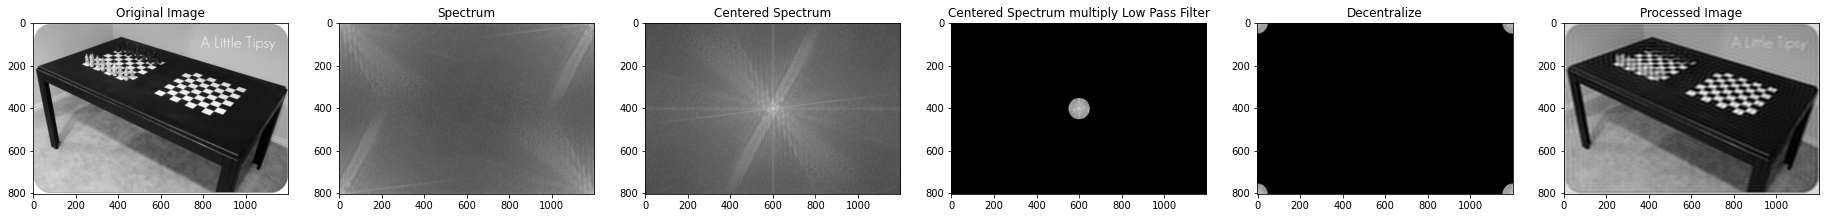

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread('chess.jpg', 0)
plt.subplot(161), plt.imshow(img, 'gray'), plt.title('Original Image')

original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), 'gray'), plt.title('Spectrum')

center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), 'gray'), plt.title('Centered Spectrum')

LowPassCenter = center * idealFilterLP(50, img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), 'gray'), plt.title('Centered Spectrum multiply Low Pass Filter')

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), 'gray'), plt.title('Decentralize')

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), 'gray'), plt.title('Processed Image')

plt.show()

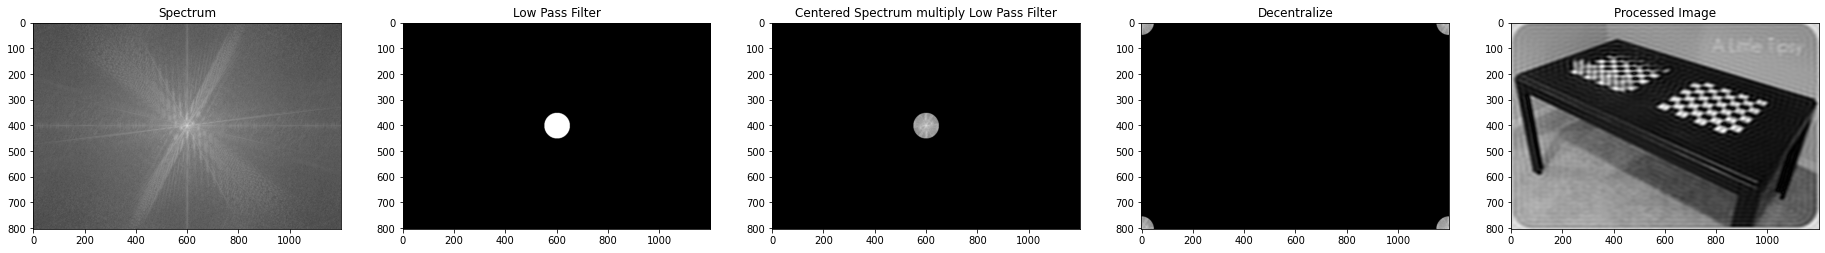

In [ ]:
img = cv2.imread('chess.jpg', 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), 'gray'), plt.title('Spectrum')


LowPass = idealFilterLP(50, img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), 'gray'), plt.title('Low Pass Filter')


LowPassCenter = center * idealFilterLP(50, img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), 'gray'), plt.title('Centered Spectrum multiply Low Pass Filter')


LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), 'gray'), plt.title('Decentralize')


inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), 'gray'), plt.title('Processed Image')

plt.show()

# High Pass Filtering using FFT/DFT

High Pass filter, on the contrary, is a filter that only allows high frequencies to pass through. High frequencies in images mean pixel values that are changing dramatically. 
e.g. Edge areas in the image with huge color changing such as the edge between two overlap white and black paper is consider as the high frequency content.

The output from high pass filter captures the edges in image which could be used to sharpen the original image with proper overlap calculation. This will enhance sharpness in original image making edges more clear.


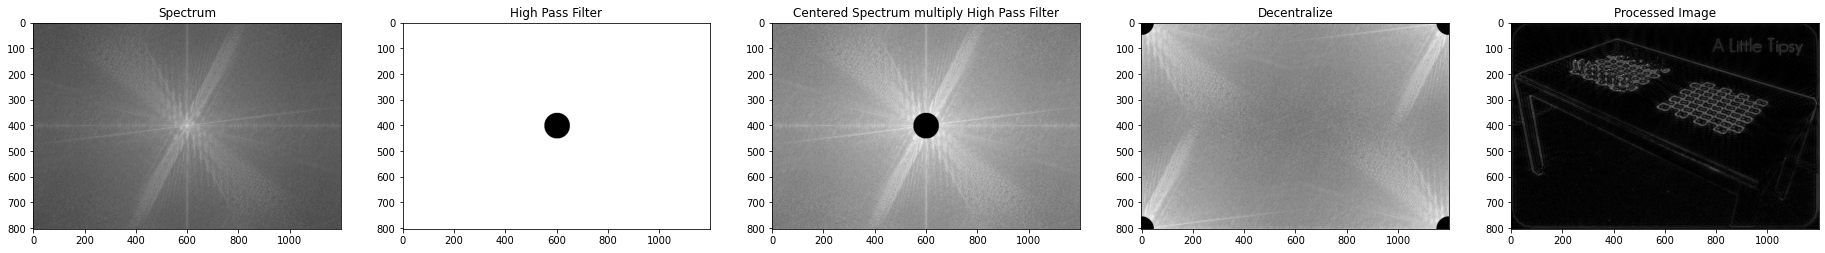

In [ ]:
img = cv2.imread('chess.jpg', 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), 'gray'), plt.title('Spectrum')

HighPass = idealFilterHP(50, img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), 'gray'), plt.title('High Pass Filter')

HighPassCenter = center * idealFilterHP(50, img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), 'gray'), plt.title('Centered Spectrum multiply High Pass Filter')

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), 'gray'), plt.title('Decentralize')

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), 'gray'), plt.title('Processed Image')

plt.show()

# Filter Types
Types of Filter:
1. Ideal Filter
The idea which behinds ideal filter is very simple: 
Given a radius value D₀ as a threshold, 
low pass filter  has H(u, v) equals to 1 under the threshold, and 
H(u, v) equals to 0 when above the threshold.

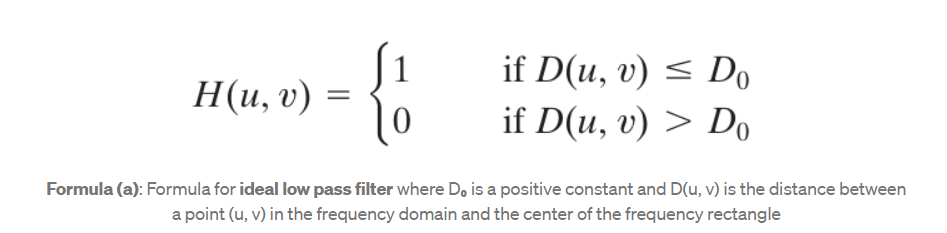



On the contrary, high pass filter Figure (g)(2) has H(u, v) equals to 0 under threshold, and H(u, v) equals to 1 when above the threshold.

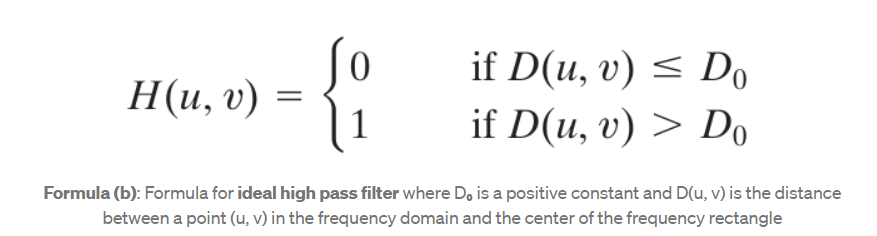



2. Butterworth Filter
Unlike an ideal filter, a Butterworth filter does not have a sharp discontinuity that gives a clear cutoff between passed and filtered frequencies. Butterworth filter introduces a new parameter n in the function. While manipulating n, it affects the clearness of the cutoff between passed and filtered frequencies.

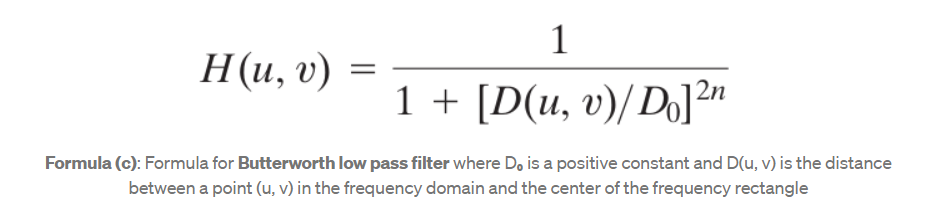


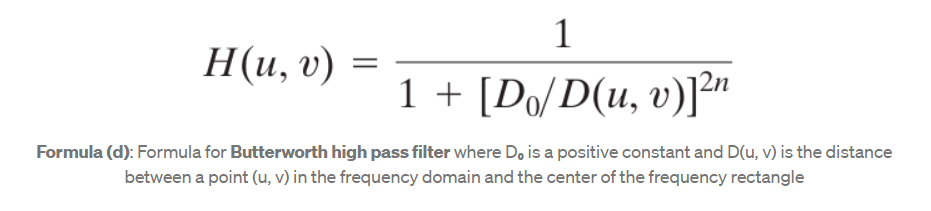


3. Gaussian Filter
Gaussian filter is a smoother cutoff version than Butterworth. The cutoff between passed and filtered frequencies is very blurry which leads to smoother processed images.


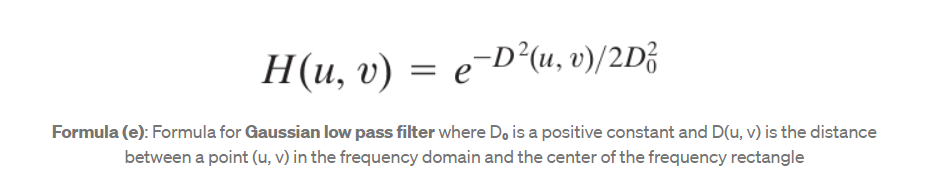


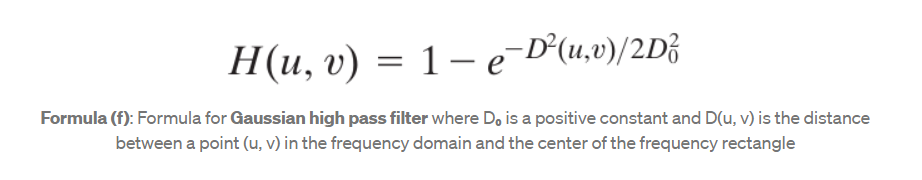


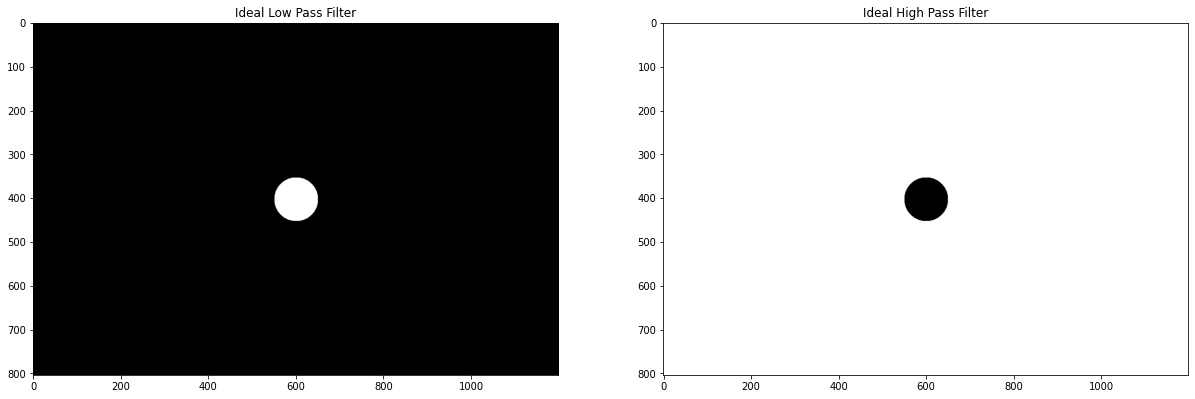

In [ ]:
# Ideal Filter code implementation
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = idealFilterLP(50, img.shape)
plt.subplot(131), plt.imshow(LowPass, 'gray'), plt.title('Ideal Low Pass Filter')

HighPass = idealFilterHP(50, img.shape)
plt.subplot(132), plt.imshow(HighPass, 'gray'), plt.title('Ideal High Pass Filter')

plt.show()

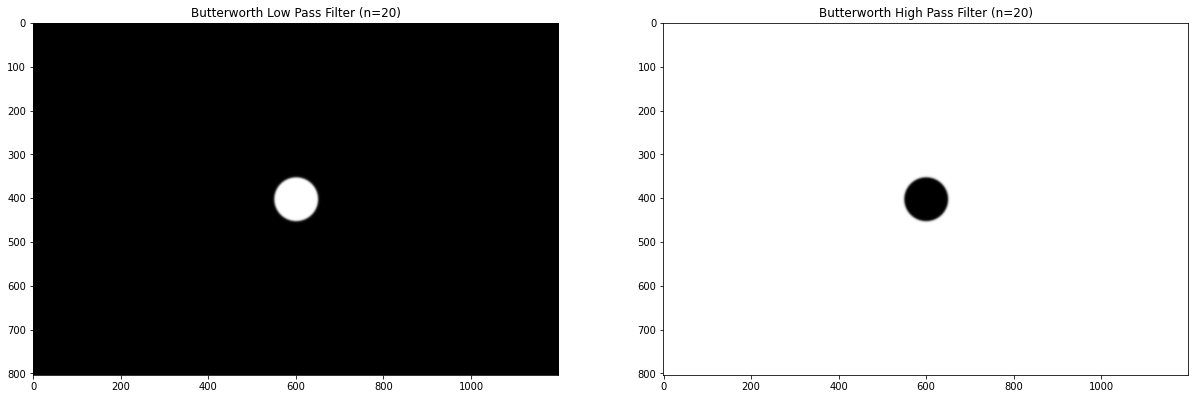

In [ ]:
# Butterworth Filter
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50, img.shape, 20)
plt.subplot(131), plt.imshow(LowPass, 'gray'), plt.title('Butterworth Low Pass Filter (n=20)')

HighPass = butterworthHP(50, img.shape, 20)
plt.subplot(132), plt.imshow(HighPass, 'gray'), plt.title('Butterworth High Pass Filter (n=20)')

plt.show()

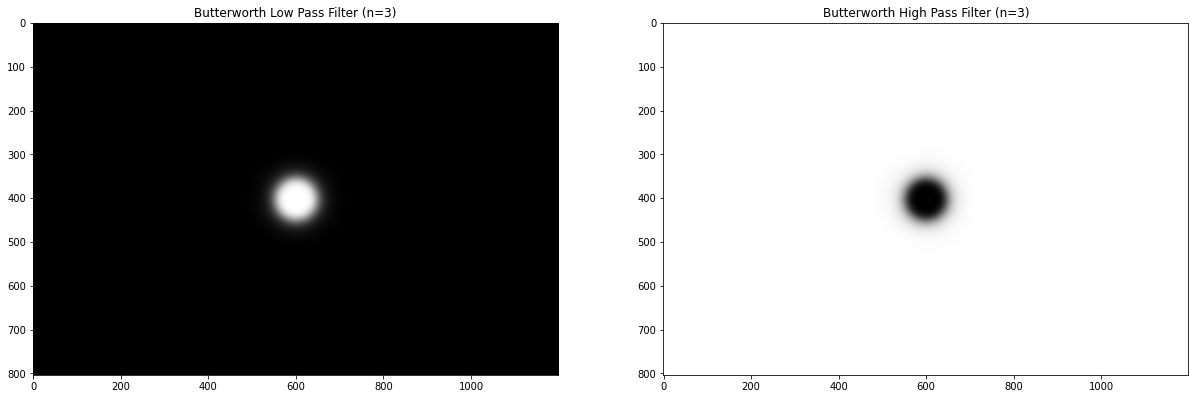

In [ ]:
# Butterworth Filter coding implementation for n = 3
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50, img.shape, 3)
plt.subplot(131), plt.imshow(LowPass, 'gray'), plt.title('Butterworth Low Pass Filter (n=3)')

HighPass = butterworthHP(50, img.shape, 3)
plt.subplot(132), plt.imshow(HighPass, 'gray'), plt.title('Butterworth High Pass Filter (n=3)')

plt.show()

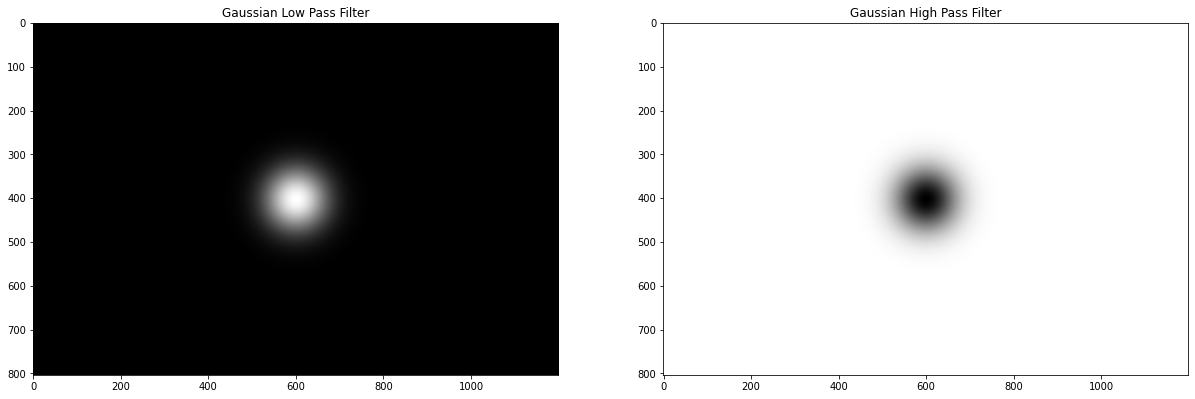

In [ ]:
# Gaussian Filter code implementation
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(50, img.shape)
plt.subplot(131), plt.imshow(LowPass, 'gray'), plt.title('Gaussian Low Pass Filter')

HighPass = gaussianHP(50, img.shape)
plt.subplot(132), plt.imshow(HighPass, 'gray'), plt.title('Gaussian High Pass Filter')

plt.show()

# Comparison Between Low and High Pass Filtering Results

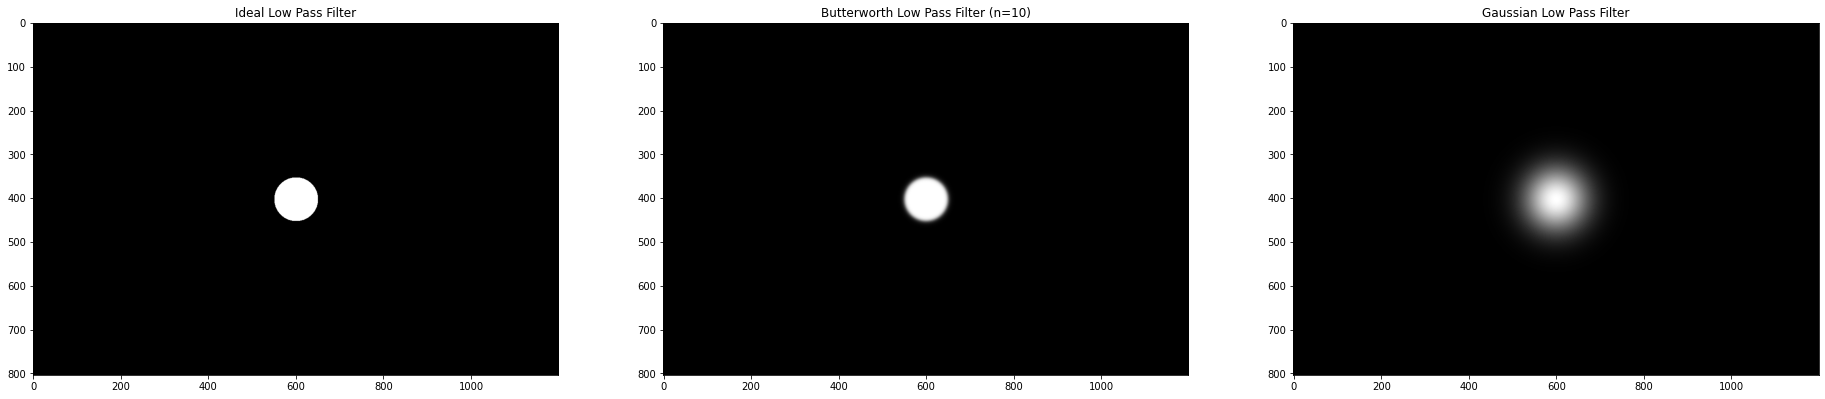

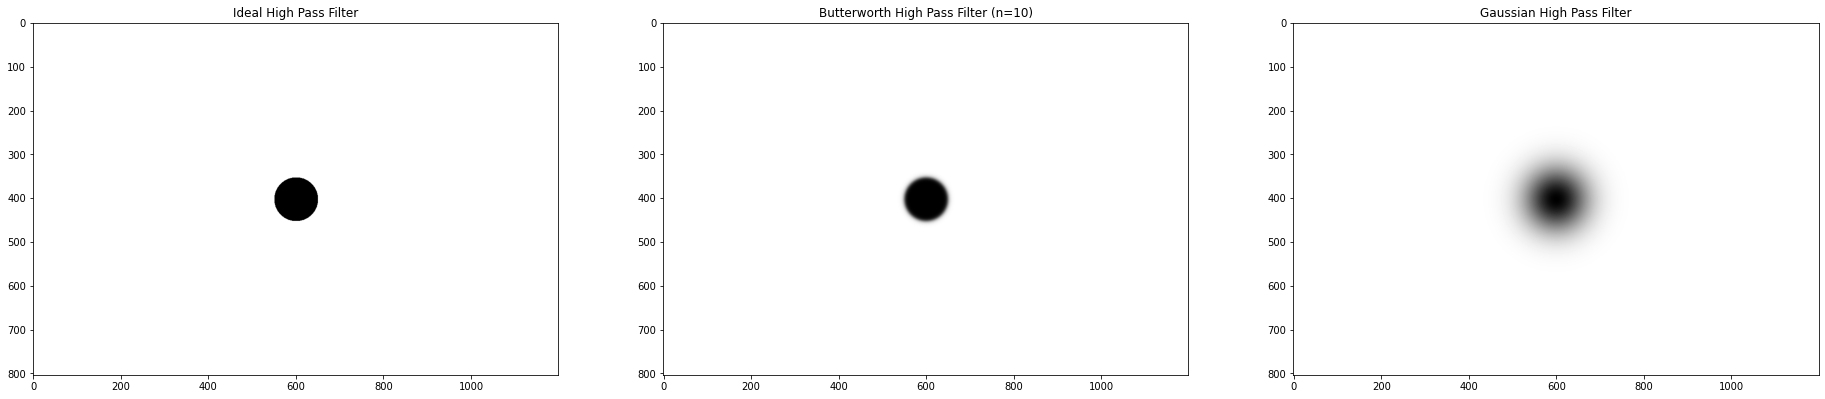

In [ ]:
# Filter Comparison
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

IdealLP = idealFilterLP(50, img.shape)
plt.subplot(131), plt.imshow(IdealLP, 'gray'), plt.title('Ideal Low Pass Filter')

ButterLP = butterworthLP(50, img.shape, 10)
plt.subplot(132), plt.imshow(ButterLP, 'gray'), plt.title('Butterworth Low Pass Filter (n=10)')

GaussianLP = gaussianLP(50, img.shape)
plt.subplot(133), plt.imshow(GaussianLP, 'gray'), plt.title('Gaussian Low Pass Filter')


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
IdealHP = idealFilterHP(50, img.shape)
plt.subplot(231), plt.imshow(IdealHP, 'gray'), plt.title('Ideal High Pass Filter')

ButterHP = butterworthHP(50, img.shape, 10)
plt.subplot(232), plt.imshow(ButterHP, 'gray'), plt.title('Butterworth High Pass Filter (n=10)')

GaussianHP = gaussianHP(50, img.shape)
plt.subplot(233), plt.imshow(GaussianHP, 'gray'), plt.title('Gaussian High Pass Filter')

plt.show()

# Low Pass Filter Results

The results below are low pass filter as the output image preserves overall image information.
Moreover, we could easily notice that the Gaussian filter performed better than other two filters due to low distortion.

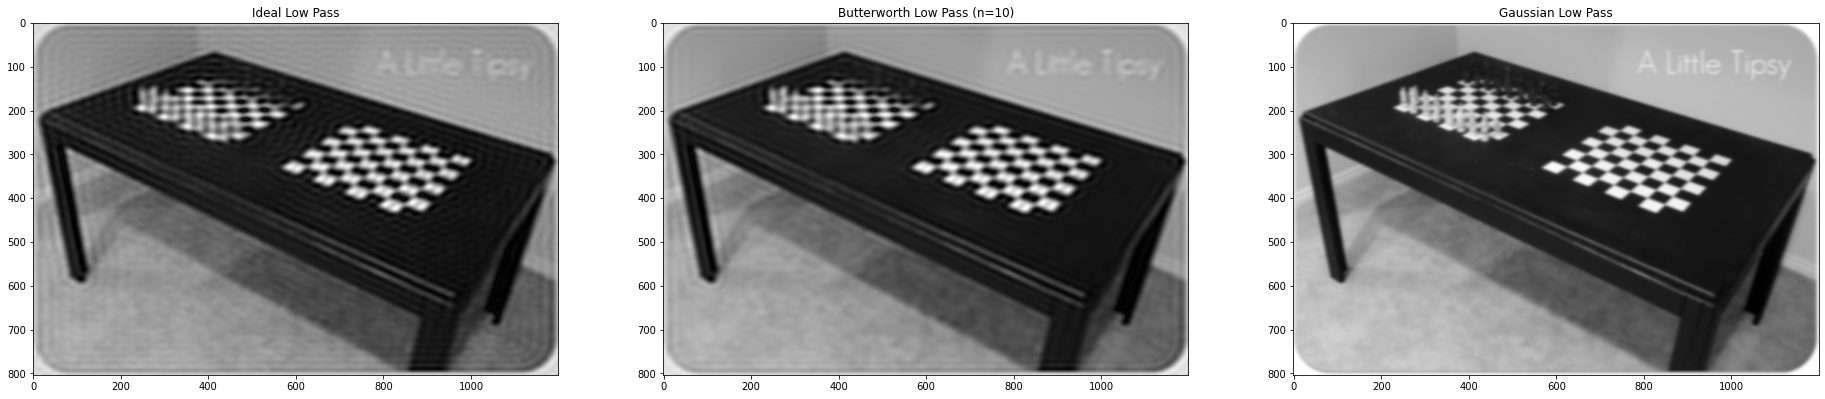

In [ ]:
# Low Pass Filters
img = cv2.imread('chess.jpg', 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50, img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), 'gray'), plt.title('Ideal Low Pass')

LowPassCenter = center * butterworthLP(50, img.shape, 10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), 'gray'), plt.title('Butterworth Low Pass (n=10)')

LowPassCenter = center * gaussianLP(50, img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), 'gray'), plt.title('Gaussian Low Pass')

plt.show()

# High Pass Filter Results

The following results are low pass filter because the output results only captured edges. The differences in high pass results between filters are similar to low pass filter results.
There are a lot of distortions in an ideal filter result when compares to Butterworth filter and a Gaussian filter.

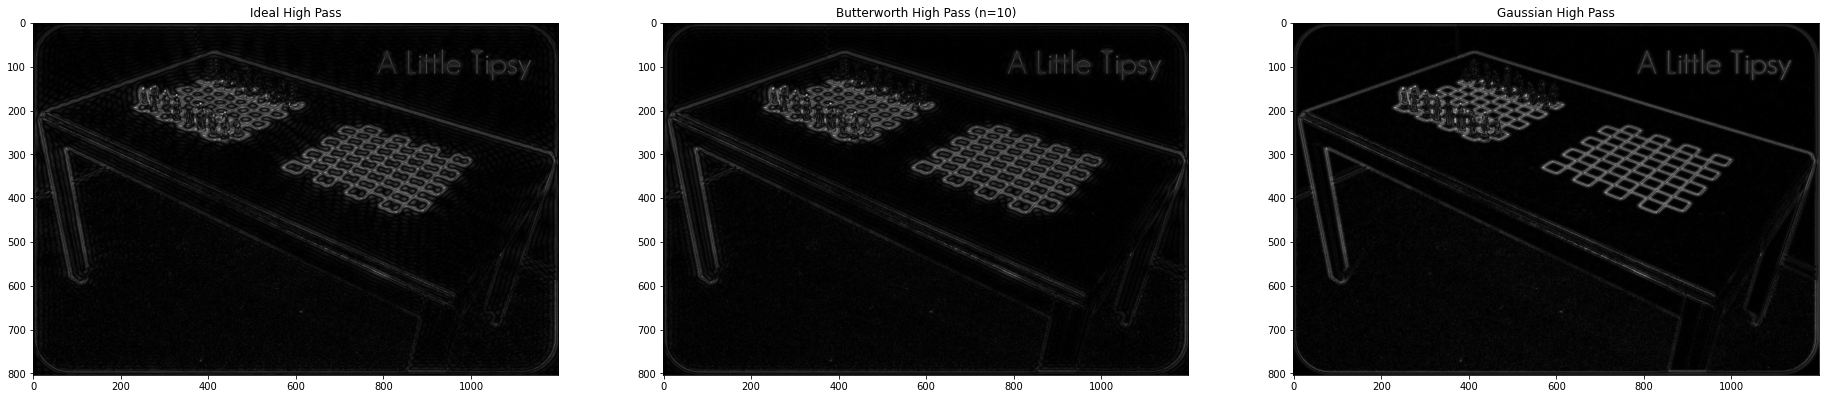

In [ ]:
# High Pass Filter Results
img = cv2.imread('chess.jpg', 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * idealFilterHP(50, img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass), 'gray'), plt.title('Ideal High Pass')

HighPassCenter = center * butterworthHP(50, img.shape, 10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), 'gray'), plt.title('Butterworth High Pass (n=10)')

HighPassCenter = center * gaussianHP(50, img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), 'gray'), plt.title('Gaussian High Pass')

plt.show()

# Wrap Up:
Wrapping up, Fourier Transformation is a very powerful tool for us to manipulate 2-Dimension information. It permits us to process image in another dimension which brings more flexibility. 

Here, in this laboratory, we learnt some basic procedures using Fourier Transformation to process image.
